In [3]:
import numpy as np
import pandas as pd

In [4]:
#df=pd.read_csv('TN_daily.csv')

In [36]:
df0 = pd.read_json("https://api.covid19india.org/v3/timeseries.json")

In [37]:

TN = df0['KL']
TN =TN.to_dict() 
data = pd.DataFrame.from_dict(TN)
data =  data.transpose()
data = data['total']
df2=pd.DataFrame(data)
#data=df2
#data['2020-06-18']
data=data.reindex(index=data.index[::-1])
data = data.drop(data.index[:30])
data

2020-06-22    {'confirmed': 3311, 'deceased': 22, 'migrated'...
2020-06-21    {'confirmed': 3173, 'deceased': 22, 'migrated'...
2020-06-20    {'confirmed': 3040, 'deceased': 22, 'migrated'...
2020-06-19    {'confirmed': 2913, 'deceased': 22, 'migrated'...
2020-06-18    {'confirmed': 2795, 'deceased': 22, 'migrated'...
                                    ...                        
2020-03-30    {'confirmed': 234, 'deceased': 1, 'recovered':...
2020-03-29    {'confirmed': 202, 'deceased': 1, 'recovered':...
2020-03-28                                   {'confirmed': 182}
2020-03-27                                   {'confirmed': 176}
2020-03-26                                   {'confirmed': 137}
Name: total, Length: 89, dtype: object

In [44]:
con = []
#dec = []
#rec = []

for index, value in data.items():
    #print(index)
    con.append(data[index]['confirmed'])
   # dec.append(data[index]['deceased'])
    #rec.append(data[index]['recovered'])
    #test.append(data[index]['tested'])
n = len(data)
day = list(range(1, n+1))
dict1 = { 'Day' : day,
'date' : data.index.values,
'Total Confirmed' :con,
#'Total Deceased' : dec,
#'Total Recovered' : rec,
#'test' : test,
}

dict1
DF= pd.DataFrame(dict1) 
DF=DF.head(len(DF))

#data['2020-06-13']['confirmed']


In [ ]:
#df = df.drop(['Date','Total Confirmed','Daily Recovered', 'Total Recovered','Daily Deceased','Daily Confirmed'], axis=1)

In [45]:
#df=df.tail(10)
ta=47
DF=DF.reindex(index=DF.index[::-1])
n = len(DF)
day = list(range(1, n+1))
DF['Day']=day
DF
df=DF
#df2=df.tail(ta)


In [57]:
df1 =DF.tail(6)

In [58]:

df1.tail()

,Day,date,Total Confirmed
4,85,2020-06-18,2795
3,86,2020-06-19,2913
2,87,2020-06-20,3040
1,88,2020-06-21,3173
0,89,2020-06-22,3311


In [59]:
#Y1 = np.array(df1['Total Confirmed'])
X1 = np.array(df1['Day'])
#X2 = np.array(df2['Day'])
#Y1 = np.array(df1['Total Confirmed'])
#Y2 = np.array(df1['Total Recovered'])
#Y3 = np.array(df1['Total Deceased'])
Y1 = np.log(df1['Total Confirmed'])
Y1 = np.array(Y1)
#Y2 = np.log(df1['Total Recovered'])
#Y2 = np.array(Y2)
#Y3 = np.log(df1['Total Deceased'])
#Y3 = np.array(Y3)
#Y4 = np.array(df2['Daily Confirmed'])

#Y4 =np.log(df2['Confirmed'])
#Y4 = np.array(Y4)
#Y5 =np.log(df2['Recovered'])
#Y5 = np.array(Y5)
#Y6 =np.log(df2['Deceased'])
#Y6 = np.array(Y6)


In [60]:
from sklearn.linear_model import LinearRegression
X1=X1.reshape(-1, 1)
#X2=X2.reshape(-1, 1)
Y1=Y1.reshape(-1, 1)
# Y2=Y2.reshape(-1, 1)
# Y3=Y3.reshape(-1, 1)
# Y4=Y4.reshape(-1, 1)
# Y5=Y5.reshape(-1, 1)
# Y6=Y6.reshape(-1, 1)

reg1 = LinearRegression().fit(X1, Y1)
# reg2 = LinearRegression().fit(X1, Y2)
# reg3 = LinearRegression().fit(X1, Y3)
# reg4 = LinearRegression().fit(X2, Y4)
# reg5 = LinearRegression().fit(X2, Y5)
# reg6 = LinearRegression().fit(X2, Y6)

logb1 = reg1.coef_
loga1 = reg1.intercept_
a1 = np.exp(loga1)
b1 = np.exp(logb1)

# logb2 = reg2.coef_
# loga2 = reg2.intercept_
# a2 = np.exp(loga2)
# b2 = np.exp(logb2)

# logb3 = reg3.coef_
# loga3 = reg3.intercept_
# a3 = np.exp(loga3)
# b3 = np.exp(logb3)

# logb4 = reg4.coef_
# loga4 = reg4.intercept_
# a4 = np.exp(loga4)
# b4 = np.exp(logb4)

# logb5 = reg5.coef_
# loga5 = reg5.intercept_
# a5 = np.exp(loga5)
# b5 = np.exp(logb5)

# logb6 = reg6.coef_
# loga6 = reg6.intercept_
# a6 = np.exp(loga6)
# b6 = np.exp(logb6)

#print("Based on Last 20 Days Data")
#print ("Total Confirmed Accuracy", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Confirmed", reg1.score(X1, Y1)*100)
# print ("coefficient of determination for Total Recovered ", reg2.score(X1, Y2)*100)
# print ("coefficient of determination for Total Deceased ", reg3.score(X1, Y3)*100)
# print("coefficient of determination for Based on Last 30 Days Data")
# print ("coefficient of determination for Daily Confirmed ", reg4.score(X2, Y4)*100)
# print ("coefficient of determination for Daily Recovered ", reg5.score(X2, Y5)*100)
# print ("coefficient of determination for Daily Deceased ", reg6.score(X2, Y6)*100)


coefficient of determination for Total Confirmed 99.90446572334439


In [65]:
drange = 31
start =len(df) +1
dval = np.arange(start,start+drange,1)
dval= np.array(dval)
val= dval
dval=dval.reshape(-1, 1)
#print(dval.shape)

start1 =len(DF)
dval1 = np.arange(start1,start1+drange,1)
dval1= np.array(dval1)
val1= dval1
dval1=dval1.reshape(-1, 1)
#print(dval1)
import datetime
base = datetime.date.today() - datetime.timedelta(days=3)
date_list = [base + datetime.timedelta(days=x) for x in range(drange)]

#DConfirmed = np.round_(np.multiply(a4,(np.power(b4,val))))
TConfirmed = np.round_(np.multiply(a1,(np.power(b1,val1))))
# #TConfirmed = np.round_(reg1.predict(dval1))
# DRecovered = np.round_(np.multiply(a5,(np.power(b5,val))))
# TRecovered = np.round_(np.multiply(a2,(np.power(b2,val1))))
# #TRecovered = np.round_(reg2.predict(dval1))
# DDeceased = np.round_(np.multiply(a6,(np.power(b6,val))))
# TDeceased = np.round_(np.multiply(a3,(np.power(b3,val1))))
# #TDeceased = np.round_(reg3.predict(dval1))

dict = {
        'Date' : date_list,
        #'Daily Confirmed': DConfirmed.flatten(), 
        'Total Confirmed': TConfirmed.flatten(), 
   #     'Daily Recovered': DRecovered.flatten() ,
    #    'Total Recovered': TRecovered.flatten(),
    #    'Daily Deceased' : DDeceased.flatten(),
     #   'Total Deceased' : TDeceased.flatten(),
        'Day' : dval1.flatten() ,
       } 
final = pd.DataFrame(dict) 
start1

89

In [62]:
df1.tail()

,Day,date,Total Confirmed
4,85,2020-06-18,2795
3,86,2020-06-19,2913
2,87,2020-06-20,3040
1,88,2020-06-21,3173
0,89,2020-06-22,3311


In [66]:
final

,Date,Total Confirmed,Day
0,2020-06-22,3305.0,89
1,2020-06-23,3445.0,90
2,2020-06-24,3590.0,91
3,2020-06-25,3742.0,92
4,2020-06-26,3900.0,93
5,2020-06-27,4064.0,94
6,2020-06-28,4236.0,95
7,2020-06-29,4415.0,96
8,2020-06-30,4601.0,97
9,2020-07-01,4795.0,98


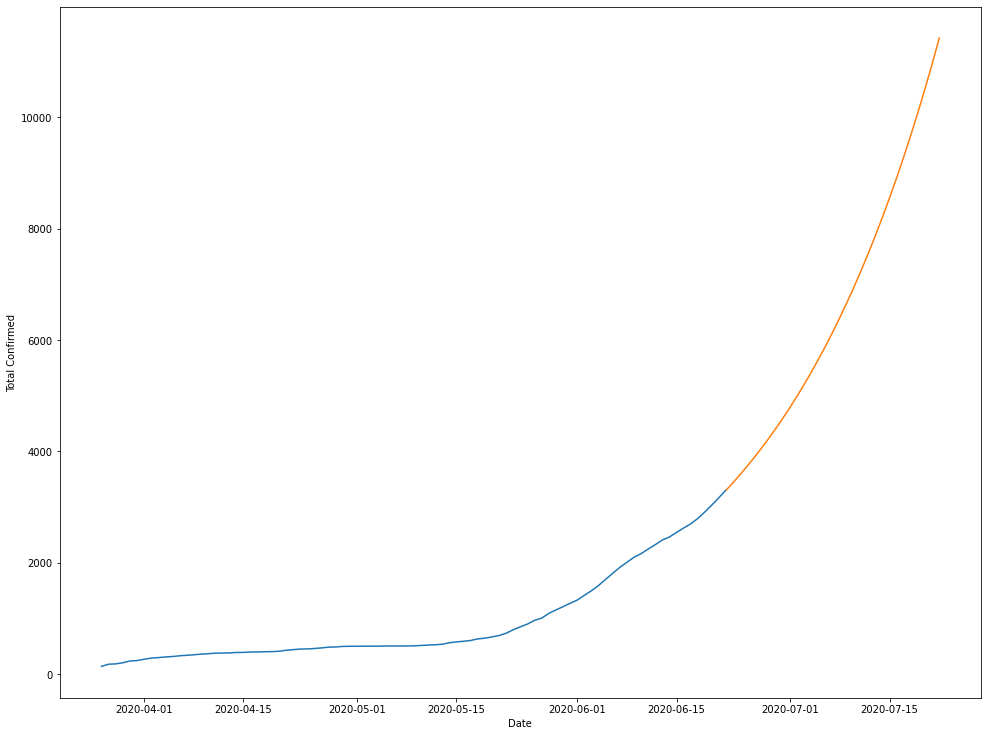

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,12))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = DF['date']
position =DF['Total Confirmed']

time1 = final['Date']
position1 = final['Total Confirmed']
axes.plot(time, position)
axes.plot(time1, position1)

plt.xlabel('Date')
plt.ylabel('Total Confirmed')
fig.savefig('KL_Total.png')

In [68]:
#save to Csv
final.to_csv("predictKL.csv")
pr=pd.read_csv('predictKL.csv')
pr.head()

,Unnamed: 0,Date,Total Confirmed,Day
0,0,2020-06-22,3305.0,89
1,1,2020-06-23,3445.0,90
2,2,2020-06-24,3590.0,91
3,3,2020-06-25,3742.0,92
4,4,2020-06-26,3900.0,93


KeyError: ignored

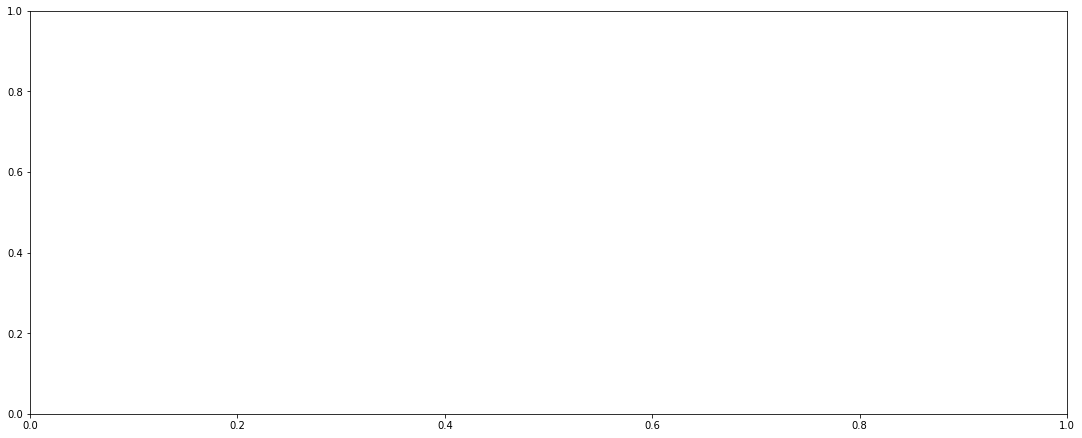

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df['date']
position =df['Confirmed']

time1 = final['Date']
position1 = final['Daily Confirmed']

axes.plot(time, position)
axes.plot(time1, position1)
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')

plt.show()
fig.savefig('TN_Daily.png')




#plt.xlabel('Date(day)')
#plt.ylabel('Total Confirmed')